In [1]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.8 MB/s eta 0:00:00


In [2]:
# standard
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# machine learning tools
from sklearn.model_selection import train_test_split
import h2o
from h2o.estimators import H2OGeneralizedLinearEstimator, H2OGradientBoostingEstimator

In [3]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

<a id='import'></a>
# Import and first glance

In [6]:
# load data
df = pd.read_csv('/content/drive/MyDrive/predictive analysis project/osteoporosis risk prediction/osteoporosis.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

df.sample(10)

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
379,104835,64,Female,Normal,No,African American,Underweight,Low,Insufficient,Active,Yes,NaN,Hyperthyroidism,Corticosteroids,No,1
250,102854,39,Female,Postmenopausal,No,Asian,Underweight,Adequate,Insufficient,Active,No,NaN,NaN,NaN,No,1
632,104281,47,Male,Postmenopausal,Yes,Asian,Normal,Adequate,Insufficient,Active,No,NaN,Rheumatoid Arthritis,NaN,Yes,1
1114,102791,34,Male,Postmenopausal,No,Caucasian,Underweight,Adequate,Sufficient,Active,Yes,Moderate,Hyperthyroidism,NaN,No,0
1641,108616,22,Female,Postmenopausal,Yes,Asian,Underweight,Adequate,Insufficient,Active,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0
1147,104850,18,Male,Postmenopausal,Yes,Caucasian,Normal,Adequate,Insufficient,Sedentary,No,NaN,NaN,NaN,Yes,0
805,105077,81,Male,Normal,No,Asian,Underweight,Adequate,Sufficient,Sedentary,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
20,107007,76,Male,Normal,Yes,Asian,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,NaN,Corticosteroids,No,1
1614,107641,34,Male,Normal,No,Caucasian,Underweight,Low,Sufficient,Active,Yes,NaN,Hyperthyroidism,Corticosteroids,Yes,0
1587,102067,26,Male,Normal,Yes,Caucasian,Underweight,Adequate,Insufficient,Active,No,NaN,NaN,NaN,Yes,0


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [9]:

df.describe(include='all')

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
count,1958.000000,1958.000000,1958,1958,1958,1958,1958,1958,1958,1958,1958,970,1311,973,1958,1958.000000
unique,NaN,NaN,2,2,2,3,2,2,2,2,2,1,2,1,2,NaN
top,NaN,NaN,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,Corticosteroids,Yes,NaN
freq,NaN,NaN,992,981,998,681,1027,1004,1011,1021,982,970,678,973,983,NaN
mean,105515.320735,39.101124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,2589.407806,21.355424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500128
min,101008.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,103348.500000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,105469.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,107755.000000,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [10]:
# define features
features_num = ['Age']

features_cat = ['Gender', 'Hormonal Changes', 'Family History',
                'Race/Ethnicity', 'Body Weight', 'Calcium Intake',
                'Vitamin D Intake', 'Physical Activity', 'Smoking',
                'Alcohol Consumption', 'Medical Conditions', 'Medications',
                'Prior Fractures']

target = 'Osteoporosis'

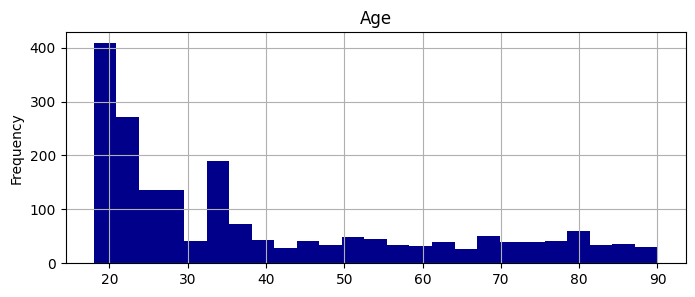

In [11]:
# plot histograms
for f in features_num:
    plt.figure(figsize=(8,3))
    df[f].plot(kind='hist', bins=25,
               color='darkblue')
    plt.title(f)
    plt.grid()
    plt.show()

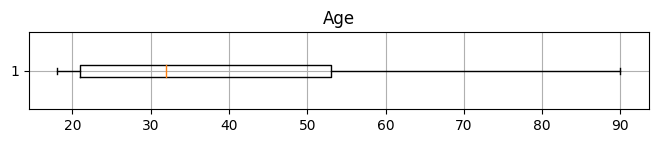

In [12]:
# boxplots
for f in features_num:
    plt.figure(figsize=(8,1))
    plt.boxplot(df[f], vert=False)
    plt.title(f)
    plt.grid()

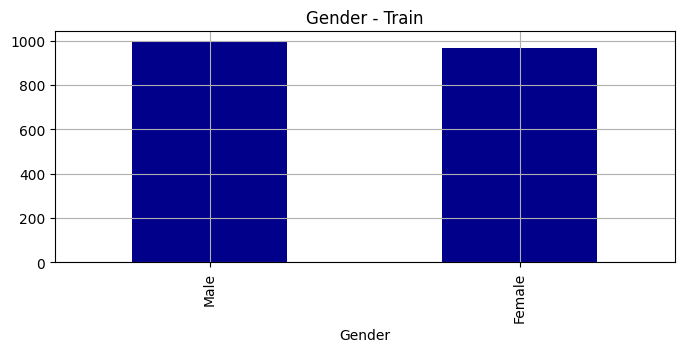

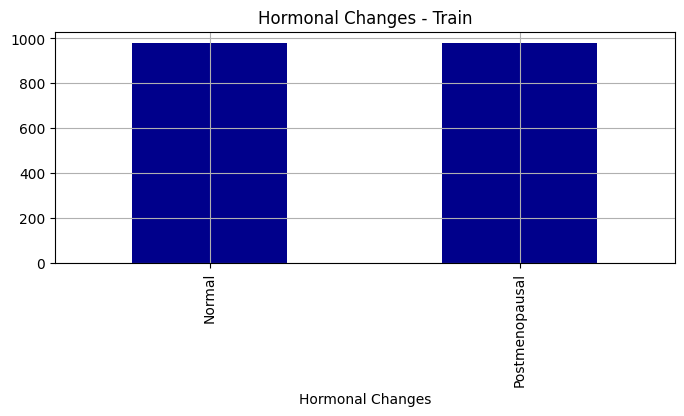

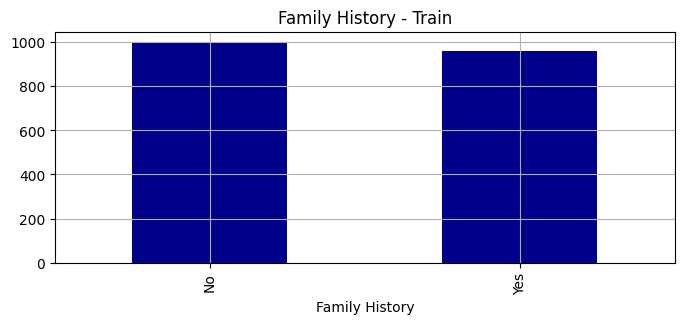

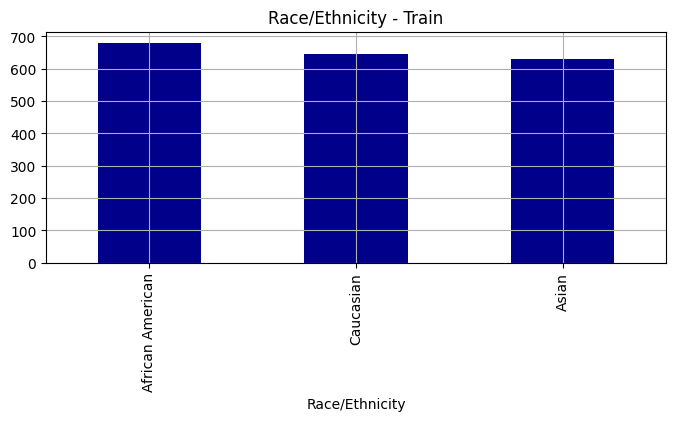

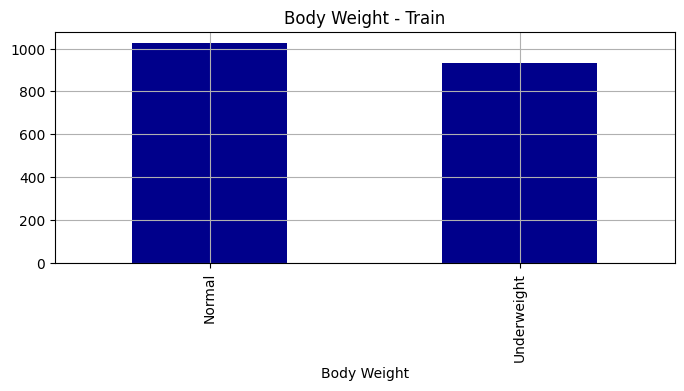

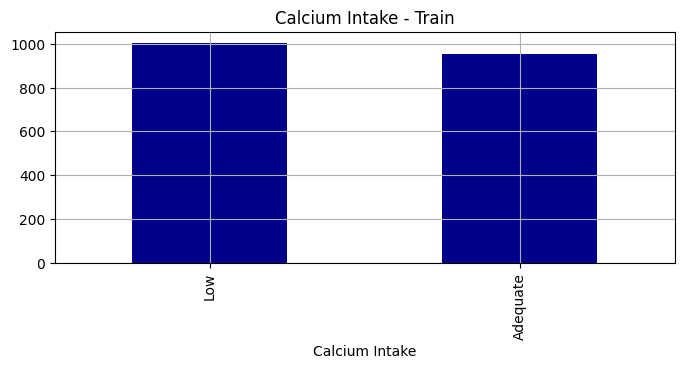

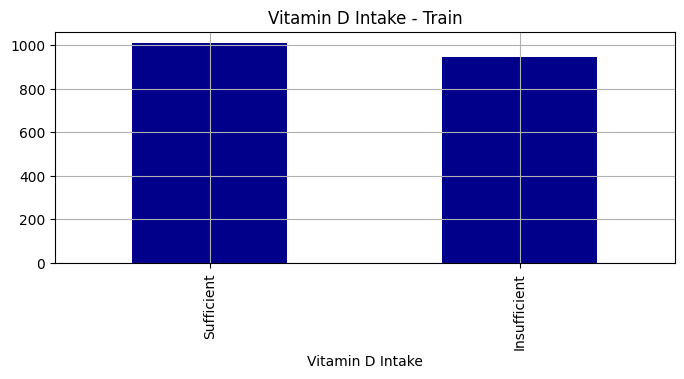

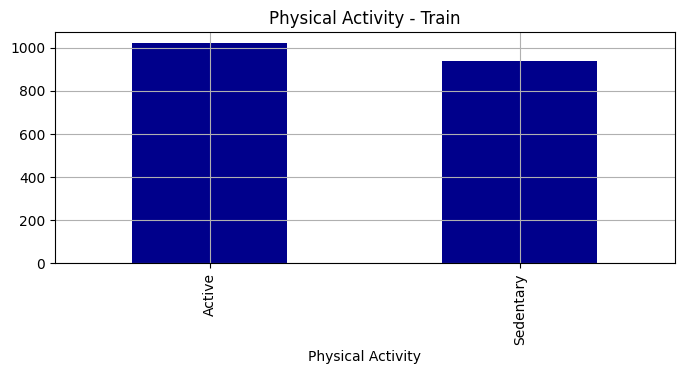

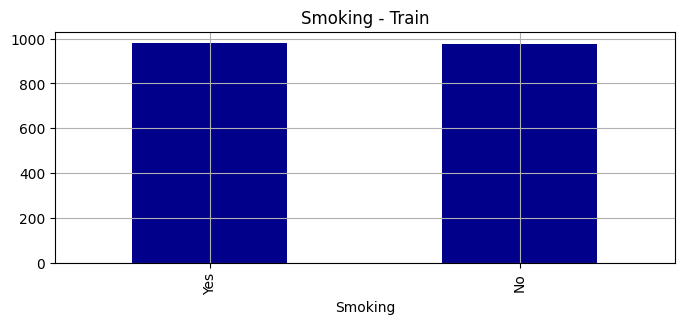

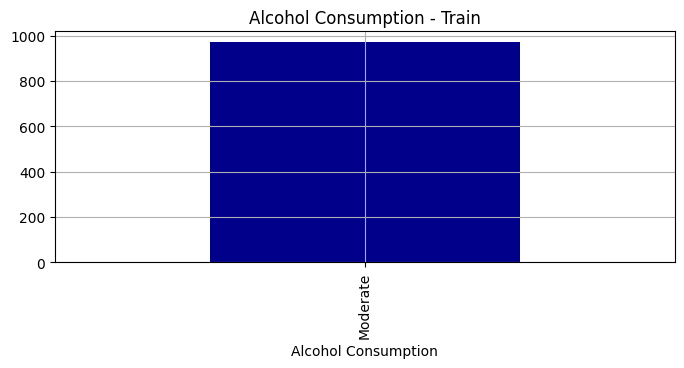

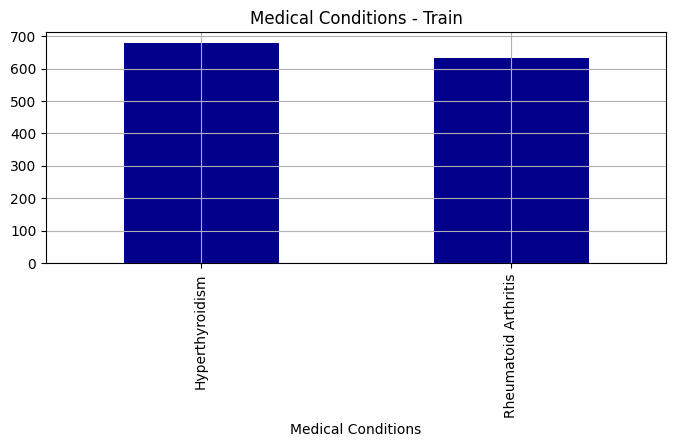

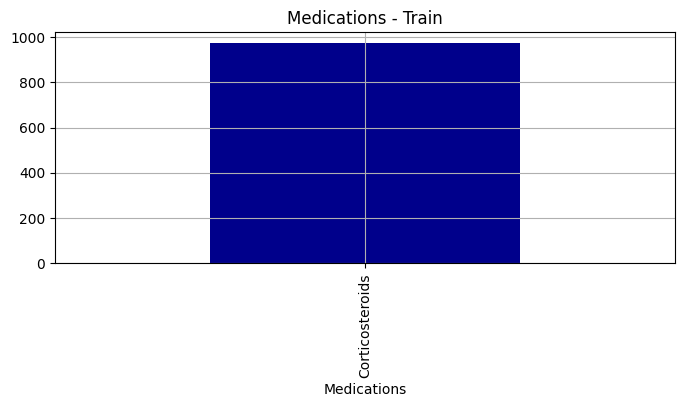

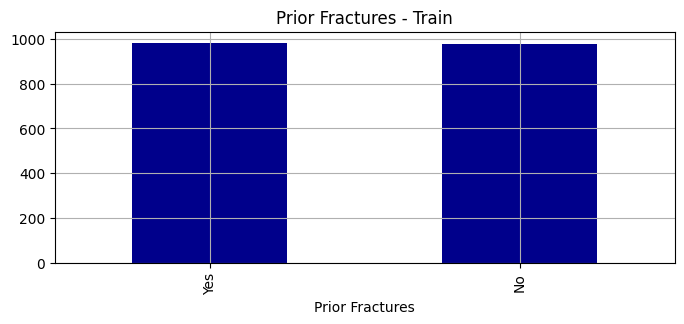

In [13]:
# plot categorical features (train and test)
for f in features_cat:
    plt.figure(figsize=(8,3))
    df[f].value_counts().plot(kind='bar', color='darkblue')
    plt.title(f + ' - Train')
    plt.grid()

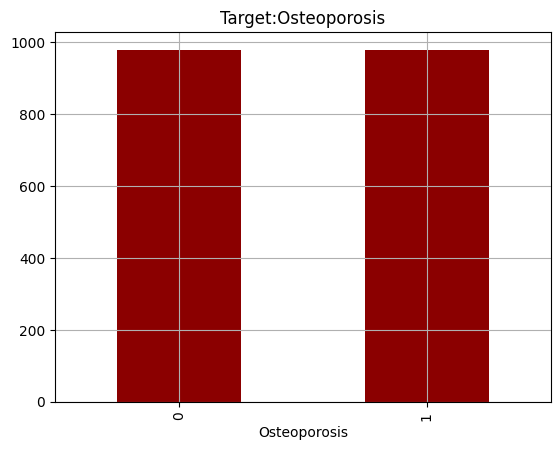

In [14]:
# plot target
df[target].value_counts().sort_index().plot(kind='bar', color=default_color_3)
plt.title("Target:" + target)
plt.grid()
plt.show()

In [15]:
# predictors
predictors = features_num + features_cat

print('Number of predictors:', len(predictors))
print()
print(predictors)

Number of predictors: 14

['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


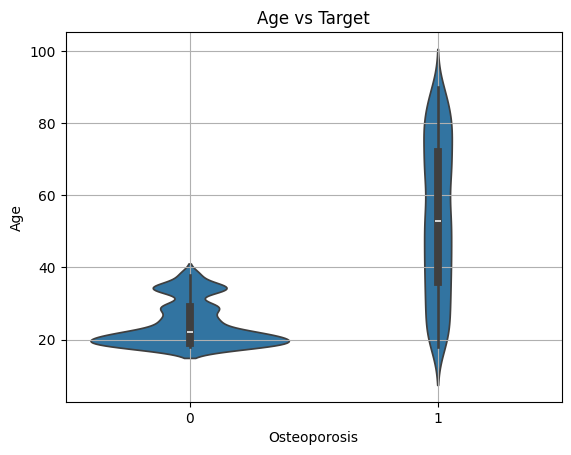

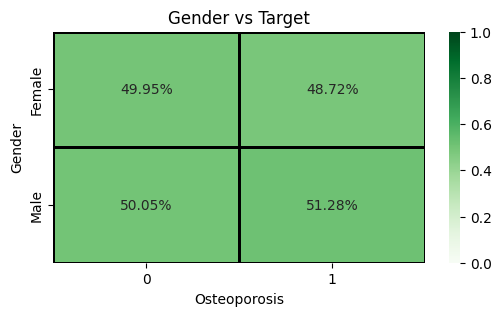

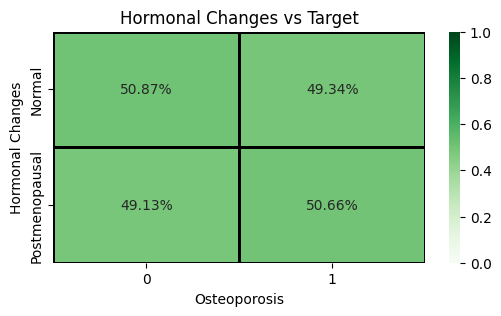

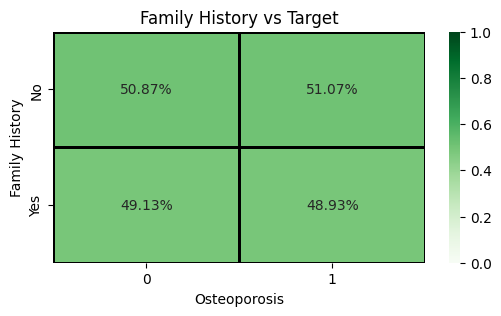

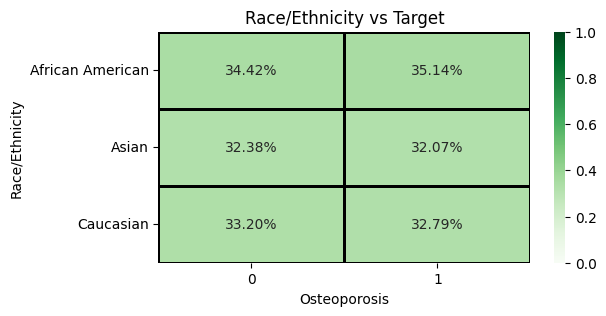

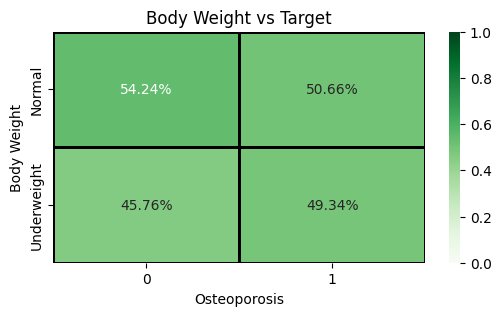

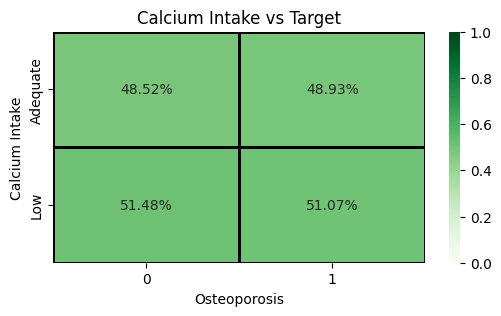

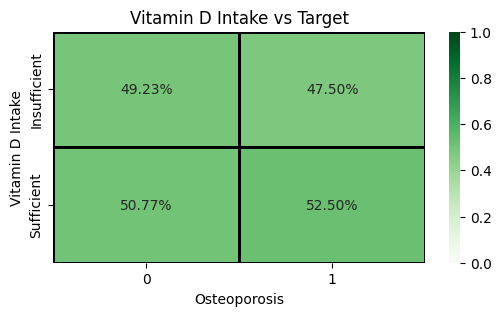

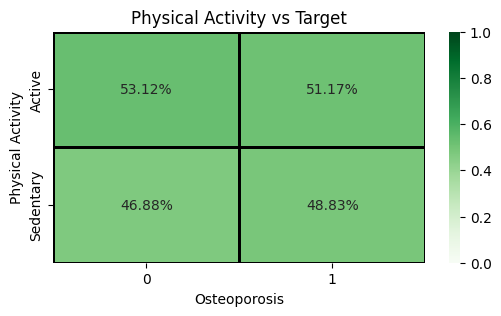

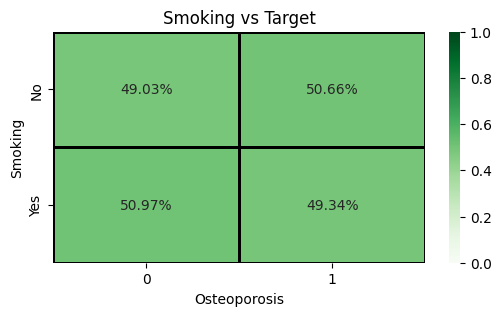

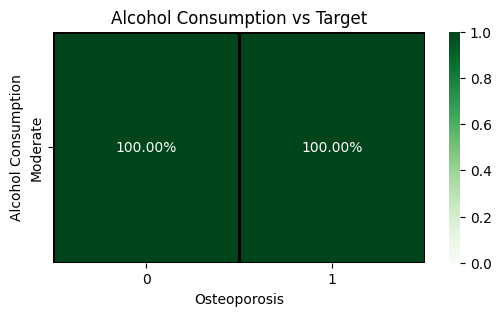

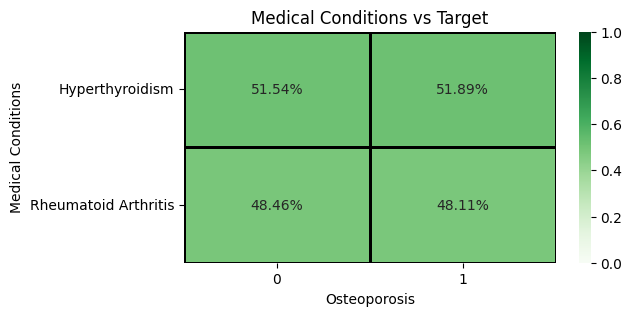

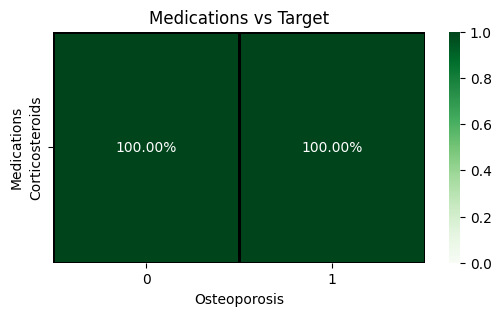

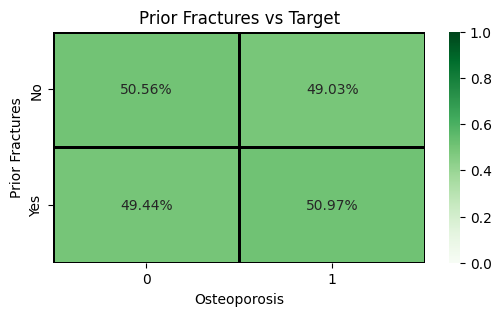

In [16]:
# plot distributions split by target
for f in predictors:
    if (f in features_num):
        sns.violinplot(data=df, x=target, y=f)
        plt.title(f + ' vs Target')
        plt.grid()
        plt.show()
    else:
        # calc cross table
        ctab = pd.crosstab(df[f],df[target])
        # ...and normalized by column
        ctab_norm = ctab / ctab.sum()
        # plot as heatmap
        plt.figure(figsize=(6,3))
        g = sns.heatmap(ctab_norm, annot=True,
                        fmt='.2%', linecolor='black',
                        linewidths=1,
                        cmap='Greens',
                        vmin=0, vmax=+1)
        plt.title(f + ' vs Target')
        plt.show()

### Evaluation binned version of age:

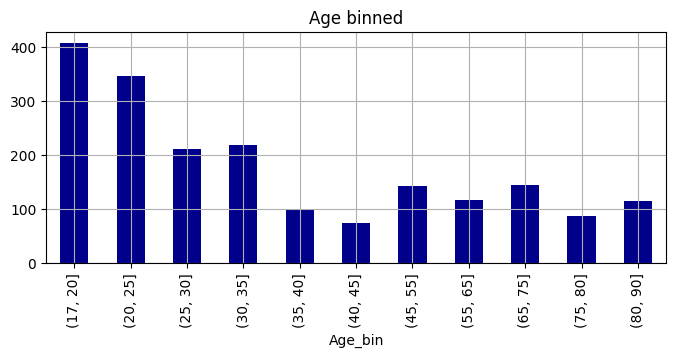

In [17]:
df['Age_bin'] = pd.cut(df.Age,[17,20,25,30,35,40,45,55,65,75,80,90])
plt.figure(figsize=(8,3))
df.Age_bin.value_counts().sort_index().plot(kind='bar', color=default_color_1)
plt.title('Age binned')
plt.grid()
plt.show()

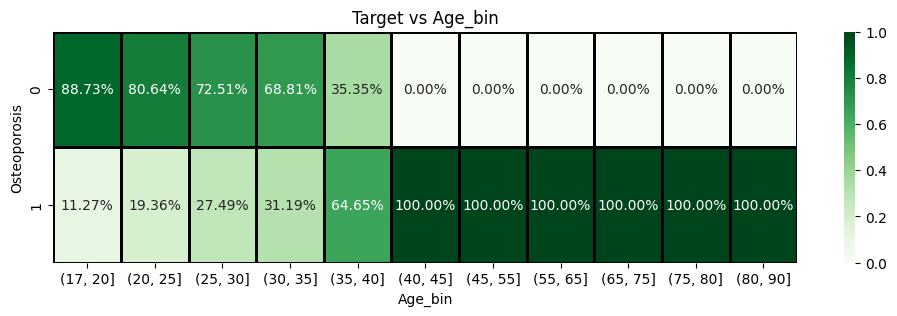

In [18]:
# mosaic plot for binned age
f = 'Age_bin'
ctab = pd.crosstab(df[target],df[f])
# ...and normalized by column
ctab_norm = ctab / ctab.sum()
# plot as heatmap
plt.figure(figsize=(12,3))
g = sns.heatmap(ctab_norm, annot=True,
                fmt='.2%', linecolor='black',
                linewidths=1,
                cmap='Greens',
                vmin=0, vmax=+1)
plt.title('Target vs ' + f)
plt.show()

In [19]:
# split data in train and test
perc_test = 0.25
df_train, df_test = train_test_split(df, test_size=perc_test, random_state=4321)

In [20]:
# reset indices to avoid trouble when later adding predictions
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [21]:
# start H2O
h2o.init(max_mem_size='12G', nthreads=4) # Use maximum of 12 GB RAM and 4 cores

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2nwkaehc
  JVM stdout: /tmp/tmp2nwkaehc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2nwkaehc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,30 days
H2O_cluster_name:,H2O_from_python_unknownUser_hl91zk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [22]:
# upload data in H2O environment
train_hex = h2o.H2OFrame(df_train)
test_hex = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
# force categorical target
train_hex[target] = train_hex[target].asfactor()

In [24]:
# define GBM
mono_config = {'Age':1} # force monotone increasing impact of age
gbm_model = H2OGradientBoostingEstimator(nfolds = 5,
                                         ntrees = 25,
                                         learn_rate = 0.05,
                                         max_depth = 4,
                                         min_rows = 10,
                                         col_sample_rate = 0.7,
                                         monotone_constraints = mono_config,
                                         score_each_iteration = True,
                                         stopping_rounds=5,
                                         stopping_metric='auc',
                                         stopping_tolerance=0.0001,
                                         seed=12345)

In [25]:
# train model
gbm_model.train(predictors, target, training_frame = train_hex);

gbm Model Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [26]:
# model details
gbm_model.show_summary()

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,14.0,14.0,3314.0,4.0,4.0,4.0,11.0,16.0,14.285714


In [27]:
# cross validation metrics
gbm_model.cross_validation_metrics_summary()

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8653464,0.0118539,0.8591065,0.8529412,0.8720539,0.8825623,0.8600683
aic,nan,0.0,nan,nan,nan,nan,nan
auc,0.8935655,0.0119719,0.880967,0.9047363,0.8914468,0.9071501,0.8835275
err,0.1346536,0.0118539,0.1408935,0.1470588,0.1279461,0.1174377,0.1399317
err_count,39.6,4.449719,41.0,45.0,38.0,33.0,41.0
f0point5,0.9098560,0.0090125,0.9212731,0.9117647,0.8986928,0.9144296,0.9031199
f1,0.8506959,0.0107410,0.8429119,0.8464164,0.8527132,0.8685259,0.8429119
f2,0.799019,0.0199141,0.7768362,0.7898089,0.8112094,0.8270106,0.7902299
lift_top_group,2.0054338,0.0995076,1.9530201,1.8658537,2.1214285,2.0661764,2.0206897
loglikelihood,nan,0.0,nan,nan,nan,nan,nan


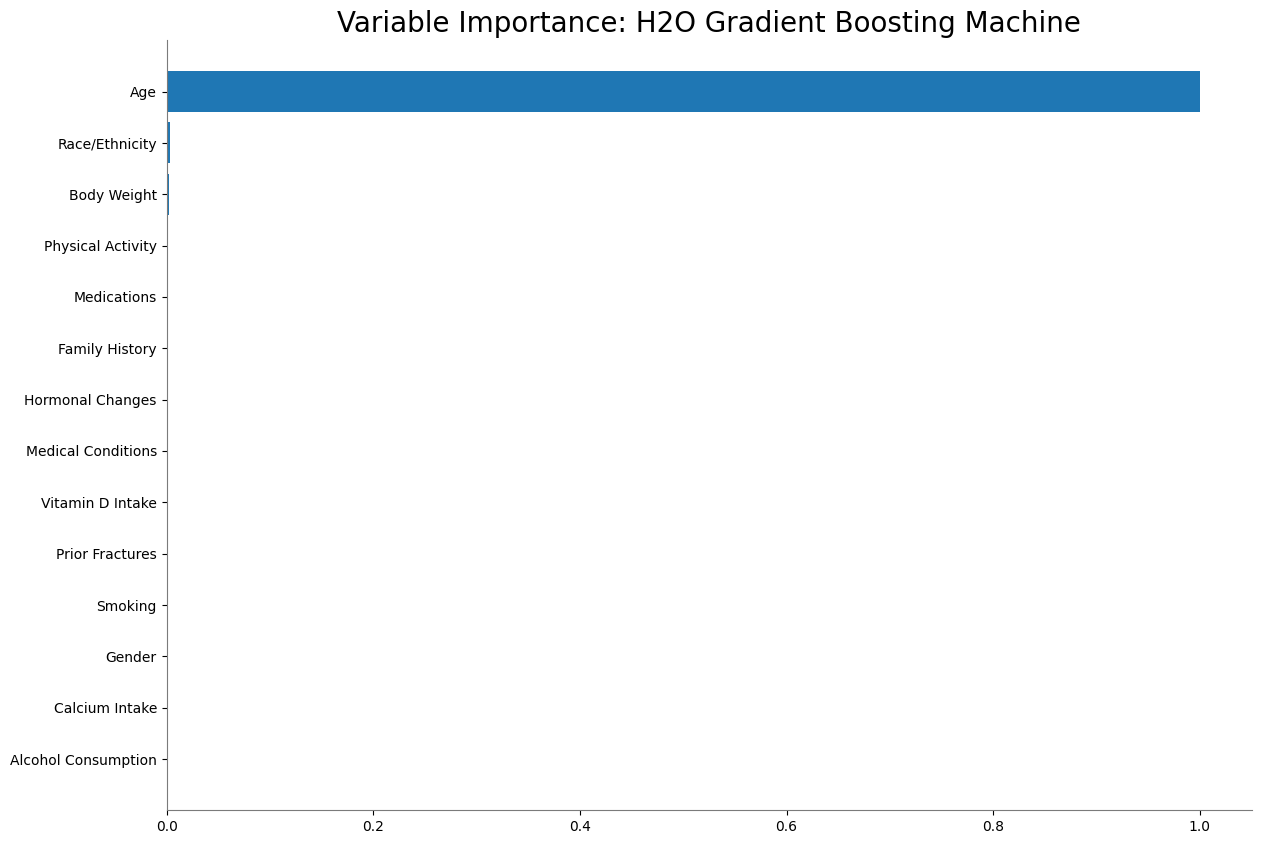

<Figure size 640x480 with 0 Axes>

In [28]:
# variable importance
gbm_model.varimp_plot(20)
plt.show()

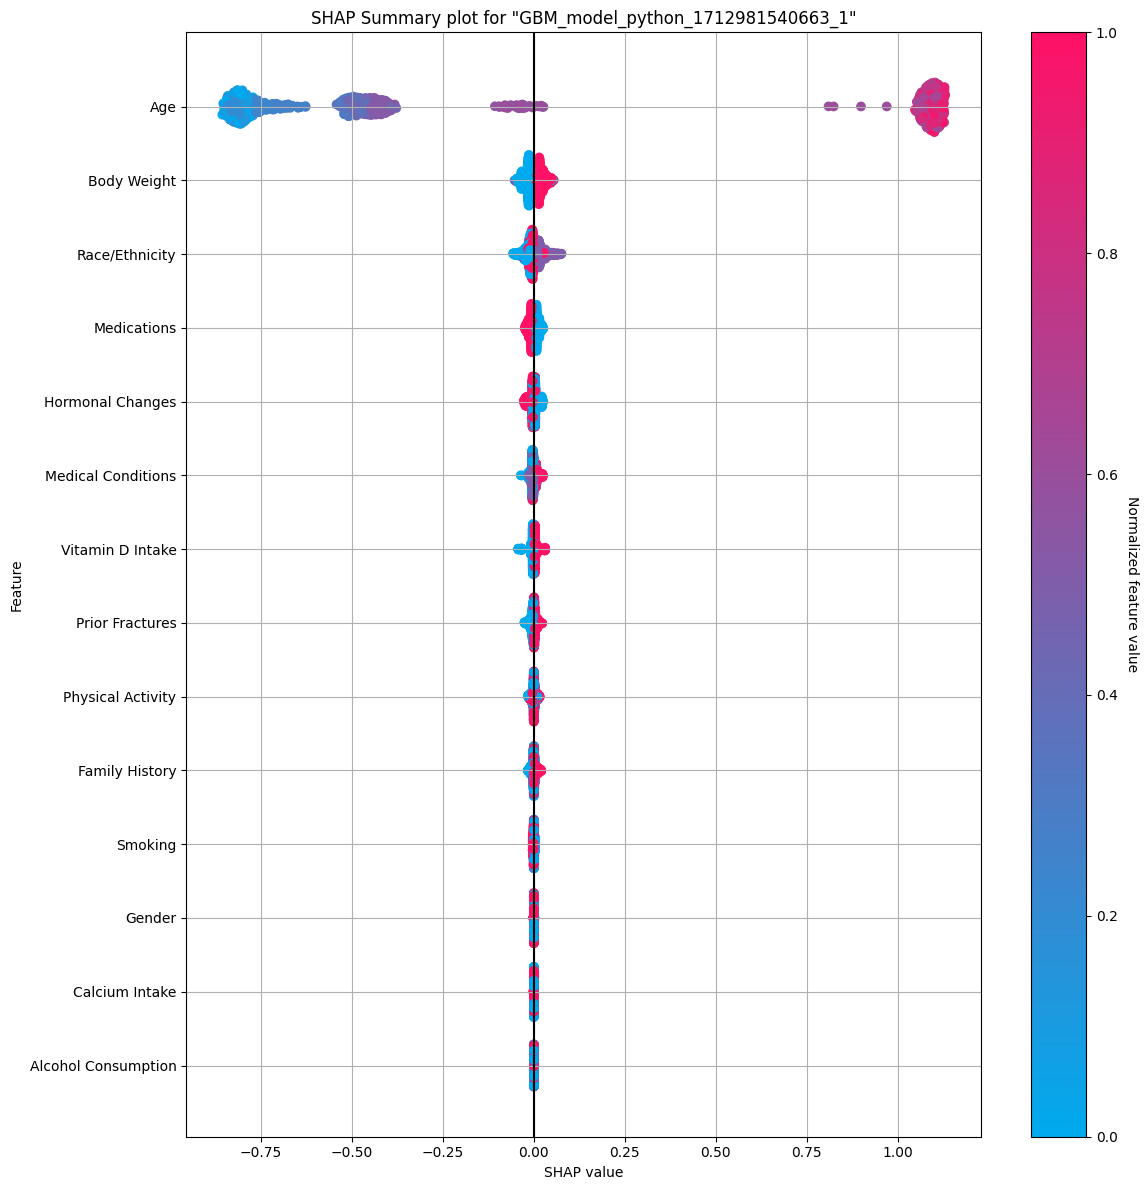

In [29]:
# SHAP variable importance
gbm_model.shap_summary_plot(train_hex);

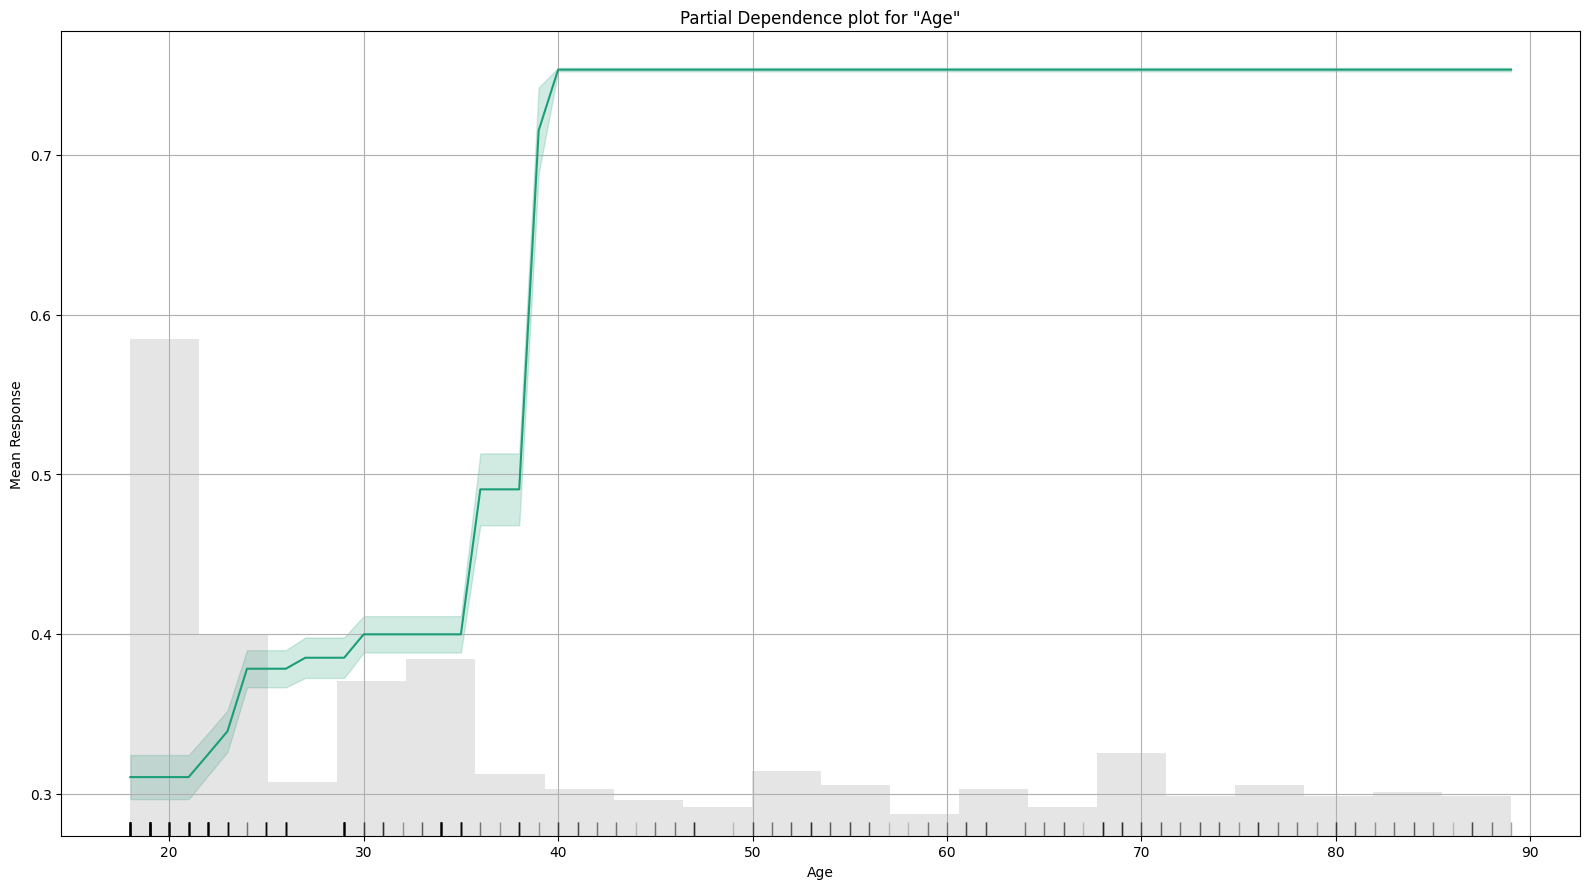

In [30]:
# let's check monotony:
# show partial dependency plot for Age
pd_plot = gbm_model.pd_plot(test_hex, 'Age')

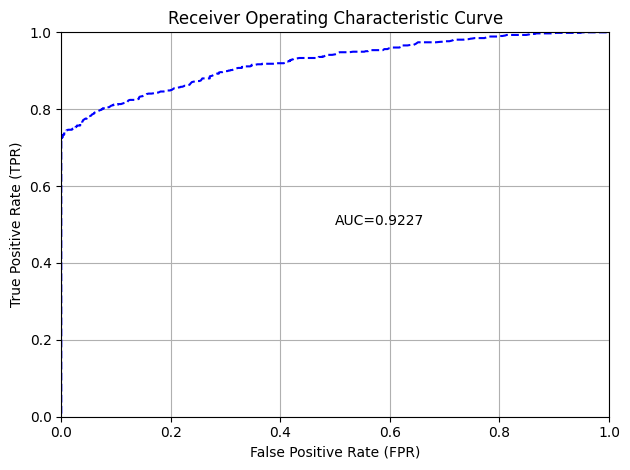

In [31]:
# ROC curve train
perf = gbm_model.model_performance(train_hex)
perf.plot(type = 'roc');

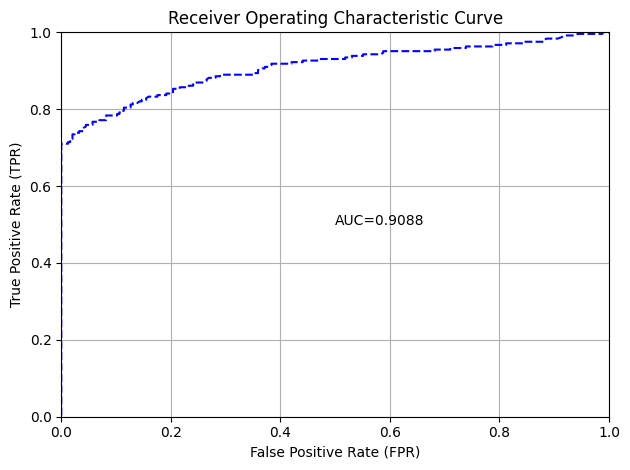

In [32]:
# ROC curve test
perf = gbm_model.model_performance(test_hex)
perf.plot(type = 'roc');

In [33]:
# predict on train data
pred_train = gbm_model.predict(train_hex).as_data_frame()
# add predictions to data frame
df_train['pred_GBM'] = pred_train.p1
df_train['pred_GBM_class'] = pred_train.predict

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [34]:
# compare frequencies
print('Actual Frequency:   ', df_train[target].sum())
print('Predicted Frequency:', np.round(df_train.pred_GBM.sum(),3))

Actual Frequency:    734
Predicted Frequency: 733.277


In [35]:
# check actual confusion matrix
pd.crosstab(df_train.pred_GBM_class, df_train[target])

Osteoporosis,0,1
pred_GBM_class,,
0,689,154
1,45,580


<a id='test'></a>
# Predict on Test Data

In [36]:
# predict on test data
pred_test = gbm_model.predict(test_hex).as_data_frame()
# add predictions to data frame
df_test['pred_GBM'] = pred_test.p1
df_test['pred_GBM_class'] = pred_test.predict

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [37]:
# basic stats
df_test.pred_GBM.describe()

count    490.000000
mean       0.495090
std        0.195758
min        0.284104
25%        0.321583
50%        0.395266
75%        0.752668
max        0.755059
Name: pred_GBM, dtype: float64

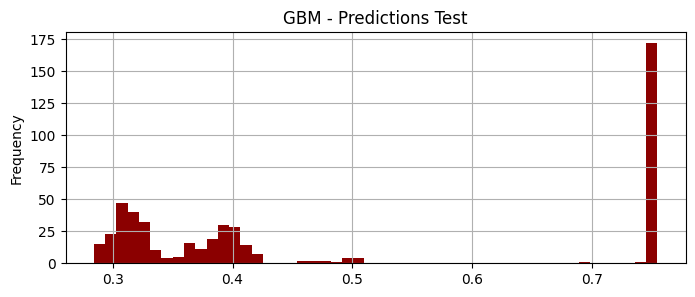

In [38]:
# plot distribution of predictions
plt.figure(figsize=(8,3))
df_test.pred_GBM.plot(kind='hist', bins=50,
                      color=default_color_3)
plt.title('GBM - Predictions Test')
plt.grid()
plt.show()

In [39]:
# compare frequencies
print('Actual Frequency:   ', df_test[target].sum())
print('Predicted Frequency:', np.round(df_test.pred_GBM.sum(),3))

Actual Frequency:    245
Predicted Frequency: 242.594


In [40]:
# show first rows of test set incl. predictions
df_test.sample(10)

,index,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis,Age_bin,pred_GBM,pred_GBM_class
368,1001,106416,19,Female,Postmenopausal,Yes,African American,Normal,Low,Insufficient,Active,No,Moderate,NaN,NaN,Yes,0,"(17, 20]",0.301849,0
262,1233,108767,18,Female,Postmenopausal,Yes,Caucasian,Underweight,Adequate,Sufficient,Sedentary,No,NaN,Rheumatoid Arthritis,Corticosteroids,No,0,"(17, 20]",0.307364,0
312,11,103872,55,Female,Normal,Yes,Caucasian,Underweight,Adequate,Sufficient,Sedentary,No,Moderate,Rheumatoid Arthritis,Corticosteroids,No,1,"(45, 55]",0.754117,1
250,82,105512,80,Male,Postmenopausal,Yes,Asian,Underweight,Adequate,Sufficient,Active,No,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,"(75, 80]",0.754197,1
261,1353,105250,22,Female,Postmenopausal,No,Asian,Underweight,Low,Insufficient,Active,No,NaN,NaN,NaN,No,0,"(20, 25]",0.324559,0
94,1924,102867,20,Male,Postmenopausal,Yes,African American,Normal,Low,Insufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,0,"(17, 20]",0.289283,0
467,184,103310,33,Female,Postmenopausal,Yes,Caucasian,Normal,Low,Sufficient,Sedentary,Yes,Moderate,NaN,NaN,No,1,"(30, 35]",0.383313,0
92,747,104126,83,Male,Postmenopausal,Yes,African American,Normal,Adequate,Sufficient,Active,No,Moderate,NaN,NaN,Yes,1,"(80, 90]",0.754289,1
474,709,102052,61,Female,Normal,No,Caucasian,Normal,Low,Insufficient,Active,No,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1,"(55, 65]",0.751594,1
62,444,104573,72,Male,Normal,No,Caucasian,Normal,Adequate,Sufficient,Sedentary,Yes,NaN,Hyperthyroidism,NaN,Yes,1,"(65, 75]",0.751604,1


In [41]:

pd.crosstab(df_test.pred_GBM_class, df_test[target])

Osteoporosis,0,1
pred_GBM_class,,
0,232,59
1,13,186


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1958 non-null   int64   
 1   Age                  1958 non-null   int64   
 2   Gender               1958 non-null   object  
 3   Hormonal Changes     1958 non-null   object  
 4   Family History       1958 non-null   object  
 5   Race/Ethnicity       1958 non-null   object  
 6   Body Weight          1958 non-null   object  
 7   Calcium Intake       1958 non-null   object  
 8   Vitamin D Intake     1958 non-null   object  
 9   Physical Activity    1958 non-null   object  
 10  Smoking              1958 non-null   object  
 11  Alcohol Consumption  970 non-null    object  
 12  Medical Conditions   1311 non-null   object  
 13  Medications          973 non-null    object  
 14  Prior Fractures      1958 non-null   object  
 15  Osteoporosis         

In [43]:
import pandas as pd


df2 = pd.DataFrame(columns = ['Id','Age','Gender','hormonal Changes','Family History',
                             'Race/Ethnicity','Body Weight','Calcium Intake','Vitamin D Intake',
                             'Physical Activity','Smoking','Alcohol Consumption','Medical Conditions',
                             'Medications','Prior Fractures'])


df2


,Id,Age,Gender,hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures


In [44]:
df2 = pd.DataFrame()


In [45]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5

In [46]:
import gradio as gr
import pandas as pd


df2 = pd.DataFrame(columns=['Age', 'Gender', 'Hormonal Changes', 'Family History',
                            'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
                            'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions',
                            'Medications', 'Prior Fractures'])


id_input = gr.Textbox(label="Enter your mobile number:")
age_input = gr.Number(label="Enter your age:")
gender_input = gr.Radio(["Male", "Female"], label="Enter your gender:")
hormonal_input = gr.Radio(["Postmenopausal", "None"], label="Have you experienced any hormonal changes, or have you reached menopause?")
FamilyHistory_input = gr.Radio(["Yes", "No"], label="Does anyone in your family have a history of osteoporosis?")
race_input = gr.Radio(["Caucasian", "Asian", "African American"], label="Please specify your ethnicity:")
weight_input = gr.Radio(["Normal", "Underweight"], label="Could you provide information about your weight status?")
cal_input = gr.Radio(["Adequate", "Low"], label="What is your Current Calcium intake level:")
vitd_input = gr.Radio(["Sufficient", "Insufficient"], label="What is your Current your Vitamin D intake level:")
phy_input = gr.Radio(["Active", "Sedentary"], label="Could you please describe your level of physical activity?")
smoke_input = gr.Radio(["Yes", "No"], label="Are you a smoker?")
alco_input = gr.Radio(["Yes", "No"], label="Do you consume alcohol?")
medi_input = gr.Radio(["Hyperthyroidism", "None", "Rheumatoid Arthritis"], label="Do you have any pre-existing medical conditions?")
medication_input = gr.Radio(["Corticosteroids", "None"], label="Are you currently taking any medications?")
Frac_input = gr.Radio(["Yes", "No"], label="Have you ever Experienced any fractures in the past?")

output = gr.Textbox(label="Osteoporosis Prediction")

def update_dataframe(id_input, age_input, gender_input, hormonal_input, FamilyHistory_input, race_input, weight_input, cal_input, vitd_input, phy_input, smoke_input, alco_input, medi_input, medication_input, Frac_input):
    global df2

    new_row = {
        'Id': id_input, 'Age': age_input, 'Gender': gender_input, 'Hormonal Changes': hormonal_input,
        'Family History': FamilyHistory_input, 'Race/Ethnicity': race_input, 'Body Weight': weight_input,
        'Calcium Intake': cal_input, 'Vitamin D Intake': vitd_input, 'Physical Activity': phy_input,
        'Smoking': smoke_input, 'Alcohol Consumption': alco_input, 'Medical Conditions': medi_input,
        'Medications': medication_input, 'Prior Fractures': Frac_input
    }

    df2.loc[len(df2)] = new_row

    hex = h2o.H2OFrame(df2)

    pred = gbm_model.predict(hex).as_data_frame()

    df2['pred_GBM'] = pred.p1
    df2['pred_GBM_class'] = pred.predict

    row_index = 0
    pred_class_value = df2.loc[row_index, 'pred_GBM_class']
    df2.drop(df2.tail(1).index, inplace=True)
    description = ""
    if pred_class_value == 0:
        description = "Upon reviewing your data, You don't have osteoporosis.That's certainly a relief! However, it's always essential to stay vigilant about our health and to seek medical advice if any concerns arise. Maintaining a healthy lifestyle, including regular exercise and a balanced diet, can help support overall well-being and prevent conditions like osteoporosis from developing in the future."
    elif pred_class_value == 1:
        description = "Upon reviewing your data, there are indications of osteoporosis.It's crucial to take indications of osteoporosis seriously. While not a final diagnosis, prompt action is advised. Schedule a doctor's appointment for confirmation and treatment discussion. Medications like bisphosphonates or hormone therapy may be prescribed. Maintain a calcium and vitamin D-rich diet with dairy, leafy greens, nuts, and fish. Engage in weight-bearing exercises like walking or dancing. Avoid smoking and limit alcohol intake. Common medications include alendronate and risedronate. Foods like fortified cereals, salmon, and yogurt help prevent osteoporosis. With proper care, including lifestyle adjustments, you can manage osteoporosis effectively."


    return description



iface = gr.Interface(
    fn=update_dataframe,
    inputs=[id_input, age_input, gender_input, hormonal_input, FamilyHistory_input, race_input,
            weight_input, cal_input, vitd_input, phy_input, smoke_input, alco_input,
            medi_input, medication_input, Frac_input],
    outputs=output,
    title="Osteoporosis Prediction",

    description="Answer the questions to predict osteoporosis."
)

iface.launch()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9e6344271128ca64bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
